In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

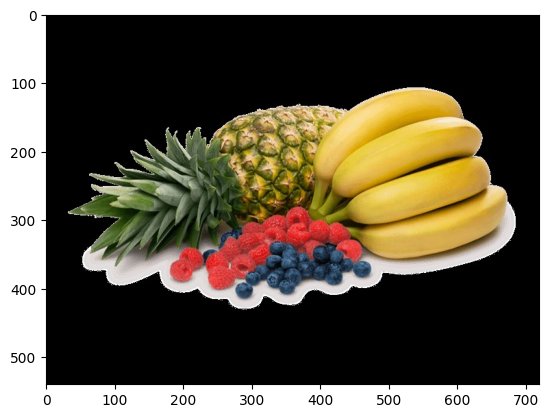

In [2]:
img = cv2.imread('fruits.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img, cmap="brg", vmin=0, vmax=255)


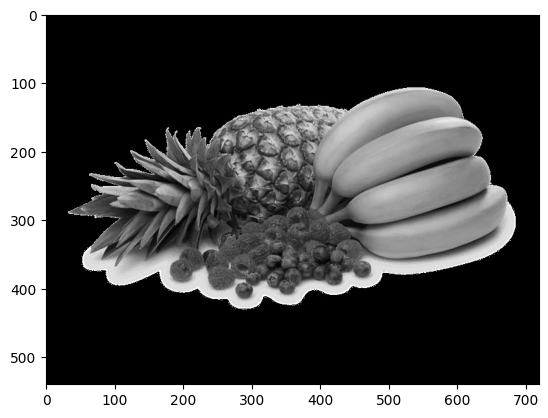

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)

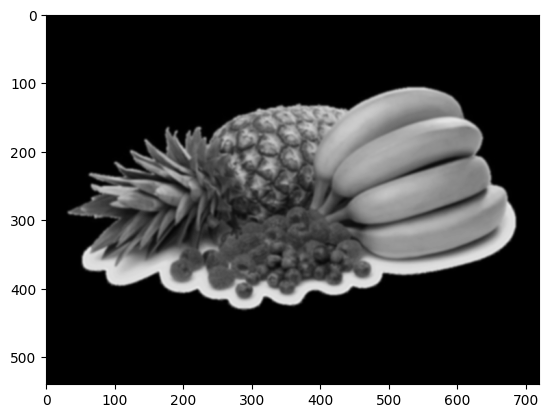

In [5]:
blur = cv2.GaussianBlur(gray,(7,7),0)
plt.imshow(blur, cmap='gray', vmin=0, vmax=255)

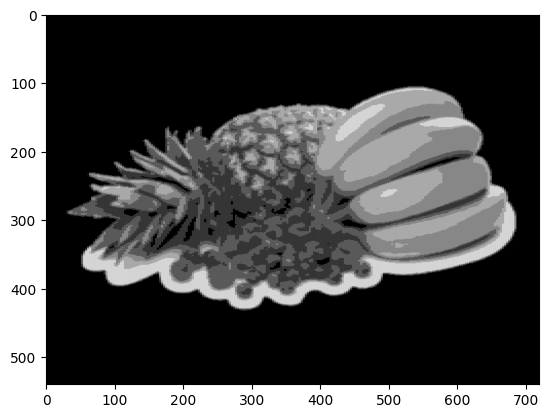

In [6]:
# convert the image to a 2D array of pixels
pixel_values = blur.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6 # number of clusters k

_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(blur.shape)
plt.imshow(segmented_image, cmap='gray', vmin=0, vmax=255)

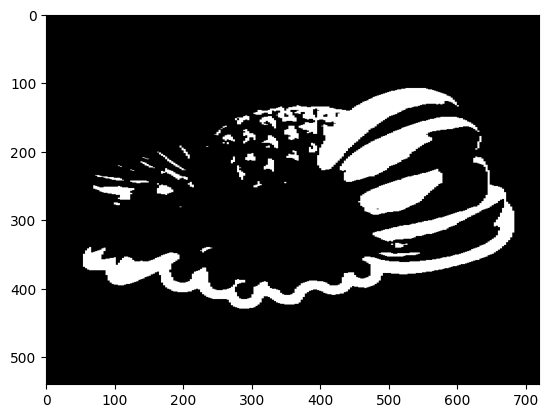

In [7]:
_, thresh = cv2.threshold(segmented_image, 165, 255, 0)
# show the image
plt.imshow(thresh, cmap='gray', vmin=0, vmax=255)

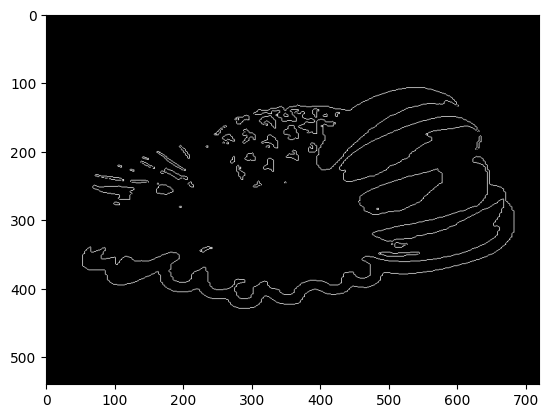

In [8]:
edges = cv2.Canny(thresh,120,200)
# show the image
plt.imshow(edges, cmap='gray', vmin=0, vmax=255)
     

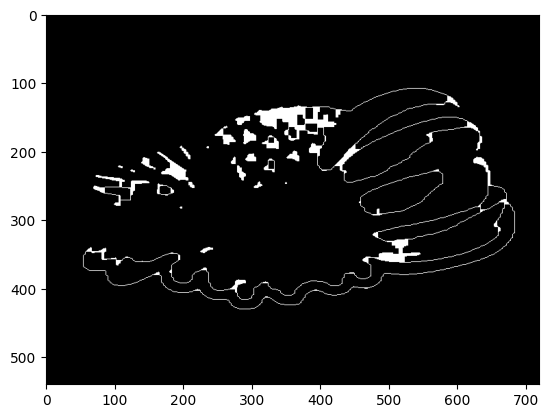

In [9]:
kernelClose=np.ones((8,8))
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernelClose)
# show the image
plt.imshow(closing, cmap='gray', vmin=0, vmax=255)


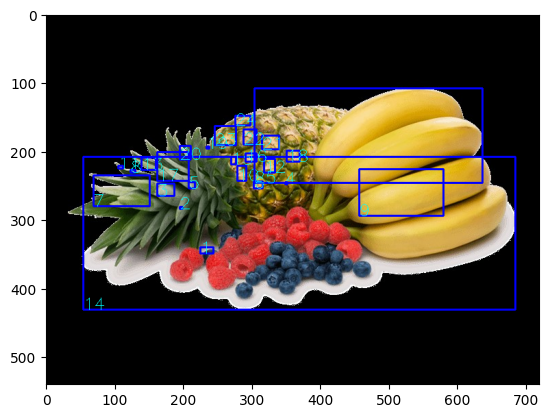

In [10]:

new_img = img.copy()
conts,h=cv2.findContours(closing.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
for i in range(len(conts)):
    x,y,w,h=cv2.boundingRect(conts[i])
    cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,0,255), 2)
    cv2.putText(new_img, str(i+1),(x,y+h),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,255))
# show the image
plt.imshow(new_img, cmap='brg', vmin=0, vmax=255)